In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import matching_catalog
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np

In [2]:
data_path = '/global/cfs/cdirs/desi/users/cpayerne/data_WP221_Target_selection/'
cosmos_clauds_hsc = Table.read(data_path + 'COSMOS_11bands-SExtractor-Lephare.fits')

In [7]:
n = np.sort(np.random.choice(len(cosmos_clauds_hsc['u']),len(cosmos_clauds_hsc['u']), replace=False))

r = cosmos_clauds_hsc['r'][n]
ug = cosmos_clauds_hsc['u'][n] - cosmos_clauds_hsc['g'][n]
gr = cosmos_clauds_hsc['g'][n] - cosmos_clauds_hsc['r'][n]
ri = cosmos_clauds_hsc['r'][n] - cosmos_clauds_hsc['i'][n]
mask_valid = (abs(ug) < 5)*(abs(gr) < 5)
mask_clean = cosmos_clauds_hsc['MASK'] [n]==0
z = cosmos_clauds_hsc['ZPHOT'][n]
mask_star = (cosmos_clauds_hsc['OBJ_TYPE'][n]> 1.5)
mask = mask_valid * (r > 22) * (r < 25.5) * mask_clean 

(-0.5, 3.0)

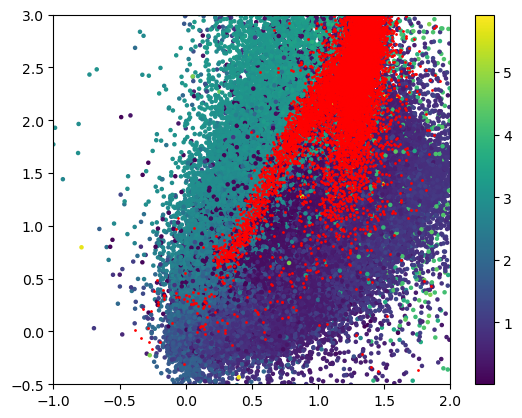

In [8]:
plt.scatter(gr[mask*(z > 0)], ug[mask* (z > 0)], s=5,c=z[mask * (z > 0)])
plt.colorbar()
plt.scatter(gr[mask * mask_star], ug[mask * mask_star], s=1,  c='r')
plt.xlim(-1, 2)
plt.ylim(-0.5, 3)

In [ ]:
n